(tema:2)=
# Theme 2: Data Matrices and Dimensional Reduction

In this Theme Exercise we will be working with "data" matrices in NumPy and a method called [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis). **Principal Component Analysis (PCA)** is a mathematical (statistical) method used for reducing the dimension of data. The method tries to identify the most important variations in a data set by converting the original variables to new, independent "components". In the "language" of Mathematics 1b we will find a new orthonormal basis, choose the most important basis-directions, and project the data down onto the subspace spanned by these basis vectors. This makes it easier to visualize and analyze complicated data. PCA is particularly useful for work with large data sets with many variables but where the essential information in the data *can* be described by a few variables, since it can help with the identification of the most relevant properties and reduce "noise" in data. 

Before we can look into the method we must first learn to do matrix operations with NumPy, since it behaves differently than SymPy. **NumPy** (Numerical Python) is a Python package that makes it easy to work with numerical data. It is indespensible for engineering students since it provides effective tools for mathematics, statistics and data analysis. It can be useful in the group project later in the course, and we will thus introduce it in this Theme exercise. You might already have NumPy installed, e.g. if you are taking the course *02003 Programming*, but if not then you can use the command `pip install numpy` to install it. NumPy contains a central data structure called “array”, which is an $n$-dimensional "container" for numbers. We will consider these arrays as matrices and vectors. 

With "data matrices" we simply mean matrices containing decimal numbers (in other words, numerical matrices), which often represent physical quantities, such as an $n \times 2$ matrix $X$ with two columns that represent, respectively, height and weight of $n$ test subjects. It is not the intention with this exercise for us to derive the PCA method or to understand it from a statistical perspective. We will instead apply it in order to "understand" our data and illustrate the concepts of eigenvector bases and orthogonal projections for data sets.  

The Theme exercise will follow the following steps:

1. Matrix calculations in SymPy, NumPy and Maple
1. Import of datasets and visualizations
1. PCA of data sets in 2D
1. Create your own data set in higher dimensions

## Matrix Operations in Computer Software

We will first consider different matrix operations in SymPy, NumPy and Maple for matrices and vectors of small sizes. Some of the matrix operations are well-known from the mathematics we have covered, such as matrix-matrix multiplication, matrix addition, and so on, while others (in particular those using NumPy) are new. One can easily risk doing something in NumPy that makes no sense, and it is thus a good idea to check one's own code for small examples by confirming the computations by hand.

In [1]:
from sympy import Matrix, init_printing
import numpy as np
import matplotlib.pyplot as plt
init_printing()

You must first define $A \in \mathbb{R}^{3 \times 3}$ and $\pmb{x} \in \mathbb{R}^{3 \times 1}$ in the 3 programs. You can use SymPy and NumPy in the same Notebook; the Maple code has to be copy/pasted into Maple:

In SymPy:

In [2]:
A = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x = Matrix([1, 2, 3])
A , x 

⎛⎡1  2  3⎤  ⎡1⎤⎞
⎜⎢       ⎥  ⎢ ⎥⎟
⎜⎢4  5  6⎥, ⎢2⎥⎟
⎜⎢       ⎥  ⎢ ⎥⎟
⎝⎣7  8  9⎦  ⎣3⎦⎠

In NumPy:

In [3]:
A_np = np.array(A, dtype=float) # "array" is used by NumPy to create matrices
x_np = np.array([1, 2, 3], dtype=float)
A_np, x_np

(array([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]),
 array([1., 2., 3.]))

In Maple (worksheet mode):

```{code}
> with(LinearAlgebra):
> A := Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]]);
> x := Transpose(Matrix([1, 2, 3]));
```

### Question a

Carry out the matrix-vector multiplication $A\pmb{x}$ in SymPy, NumPy and Maple. *Hint*: The matrix-vector and thus matrix-matrix multiplication is done using *different syntax* in all three programs, which will be using either `*` (asterisk), `.` (full-stop/period) or `@` (at).

### Question b

The expression $A + 2$ has no mathematical definition -- so it makes no mathematical sense. Investigate whether it makes sense in SymPy, NumPy, and Maple, or whether you are given an error. 

*Hint*: Again all three programs SymPy, NumPy, and Maple behave differently. Discuss which program you think behaves the most reasonable.

### Question c

NumPy often behaves like SymPy (and Maple), for instance when transposing a matrix:

In [4]:
A.T, A_np.T

(Matrix([
 [1, 4, 7],
 [2, 5, 8],
 [3, 6, 9]]),
 array([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]]))

but NumPy can create many other smart manipulations with arrays. This also means that one has to be careful not to make mistakes. It is important to know that NumPy does not know the difference between row- and column-vectors: All vectors in NumPy are 1-dimensional. One can thus not say whether it is a "upright" vector or a "lying-down" vector, so this distinction would make no difference in NumPy. This can be seen by `x_np` having a size of "3" rather than "(3,1)" or "(1,3)":

In [5]:
A_np.shape, x_np.shape

In the following you must explain how/what NumPy computes, and how you would write out mathematically or in SymPy (if at all possible):

In [6]:
x_np @ x_np, x_np.dot(x_np)

In [7]:
A_np.dot(x_np)

array([14., 32., 50.])

In [8]:
x_np @ A_np

array([30., 36., 42.])

In [9]:
A_np * x_np, x_np * A_np

(array([[ 1.,  4.,  9.],
        [ 4., 10., 18.],
        [ 7., 16., 27.]]),
 array([[ 1.,  4.,  9.],
        [ 4., 10., 18.],
        [ 7., 16., 27.]]))

### Question d

When we create orthogonal projections on lines as in Week 3, we often need to create an $n \times n$ projection matrix from the matrix-matrix product of an $n \times 1$ column vector and a $1 \times n$ row vectors. In SymPy we would do:

In [10]:
u = x / x.norm()
u * u.T

⎡1/14  1/7  3/14⎤
⎢               ⎥
⎢1/7   2/7  3/7 ⎥
⎢               ⎥
⎣3/14  3/7  9/14⎦

In [11]:
_.evalf()   # as decimal number

⎡0.0714285714285714  0.142857142857143  0.214285714285714⎤
⎢                                                        ⎥
⎢0.142857142857143   0.285714285714286  0.428571428571429⎥
⎢                                                        ⎥
⎣0.214285714285714   0.428571428571429  0.642857142857143⎦

How can you do this in NumPy? Why does the following not work?

In [12]:
u_np = x_np / np.linalg.norm(x_np)
u_np @ u_np.T

```{hint}
:class: dropdown
Vectors are 1-dimensional arrays in NumPy so transposing them has no effect. One can use `.reshape(n,m)` to convert these arrays to "tw-dimensional" matrices. 
```

```{hint}
:class: dropdown
For instance `u_np.reshape(3, 1)` and `u_np.reshape(1, 3)`.
```

## Import of Data Sets and Visualizations

### Question e

Download the file <a href="../_assets/weight-height.csv">weight-height.csv</a>. The data file is from [Kaggle](https://www.kaggle.com/code/martandsay/height-weight-regression-classification) and can also be downloaded from there. Import the CSV file with NumPy using the following command

In [13]:
# Load the CSV file into a NumPy array
data = np.genfromtxt('weight-height.csv', delimiter=',', dtype=[('Gender', 'U10'), ('Height', float), ('Weight', float)], names=True)

# Access the columns by their names
gender = data['Gender']
height = data['Height']
weight = data['Weight']

# Print the data
# print(data.dtype)
print(gender)
print(height)
print(weight)

['"Male"' '"Male"' '"Male"' ... '"Female"' '"Female"' '"Female"']
[73.84701702 68.78190405 74.11010539 ... 63.86799221 69.03424313
 61.94424588]
[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


### Question f

Explain the following plot. What does each point/intersection correspond to?

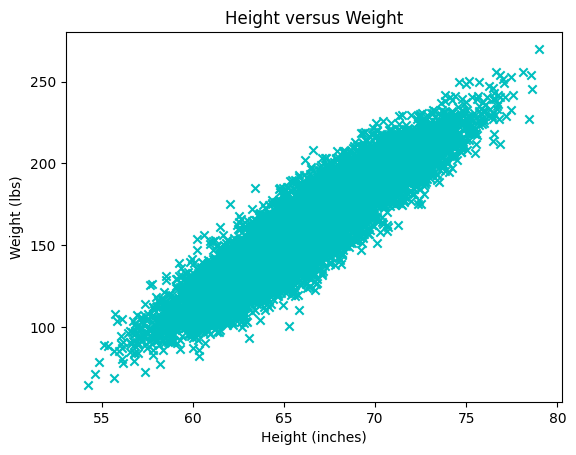

In [14]:
plt.scatter(x=height, y=weight, color='c', marker='x')
plt.title("Height versus Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.plot() 

### Question g

Explain what the following data matrix contains:

In [15]:
X = np.array([height, weight]).T
X.shape

In [16]:
# the 10 first rows
X[:,0:10]

array([[ 73.84701702, 241.89356318],
       [ 68.78190405, 162.31047252],
       [ 74.11010539, 212.74085556],
       ...,
       [ 63.86799221, 128.47531878],
       [ 69.03424313, 163.85246135],
       [ 61.94424588, 113.64910268]])

### Question h

Write out a Python function that computes the average of *each* column in the $X$ matrix:

In [17]:
def average_of_each_column(X):
    # add code
    return X[0,:]  # fix this to return the average of each column

The output (after `return`) must be a NumPy array with `shape`(2,), meaning an average-value vector with a length fo 2. Check your function with the call:

```{code} ipython3
X - average_of_each_columns(X)
```

```{hint}
:class: dropdown
The easiest might be to use a built-in method. See https://numpy.org/doc/stable/reference/generated/numpy.mean.html.
```

In [18]:
def average_of_each_column(X):
    return X.mean(axis=0)

### Question i

We must now standardize the data, which in this exercise is done simply by centering the data set (the "data cloud") at $(0,0)$. More precisely, in each column of $X$ you must subtract the column average from each element in the column. In Python simply:

In [19]:
def standardize(X):
    return X - average_of_each_column(X) # 'broadcasting' the vector as we saw above

X_st = standardize(X)

Plot the new standardized data set $X_{st}$ and check that it is centered around $(0,0)$.

*Hint*: Remember that the data set $X$ can be plotted by:

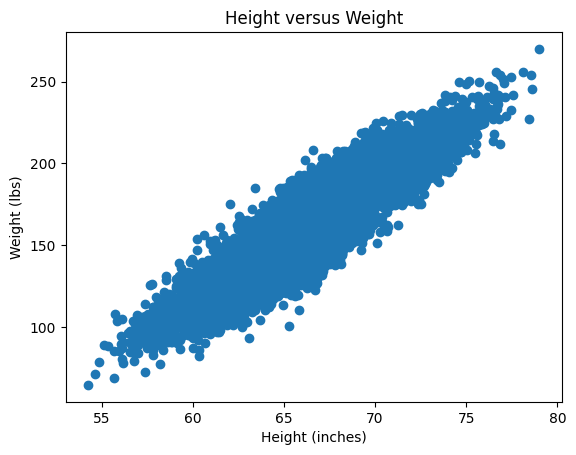

In [20]:
plt.scatter(X[:,0], X[:,1]) # X[:,0] is height and X[:,1] is weight
plt.title("Height versus Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.plot() 

Now just do the same for $X_{st}$.

## Covariance Matrix

### Question j

We will now briefly return to the mathematics for a moment and ask you to prove the following:

Let $X$ be an arbitrary, real $n \times k$ matrix. Proof that the $k \times k$ matrix $C$ given by $C = X^T X$ is symmetric. Argue that $C$ has real eigenvalues and $k$ orthogonal eigenvectors.

### Question k (optional)

Prove that $C$ actually is positive semi-definite and thus cannot have negative eigenvalues. You may skip this exercise for now and return to it later.

### Question l

We return to the standardized data matrix $X_{st}$ and compute the $C$ matrix by:

In [21]:
C = 1/(X_st.shape[0]-1) * X_st.T @ X_st
C

array([[  14.80347264,  114.24265645],
       [ 114.24265645, 1030.95185544]])

The matrix $C$ is called the [(sample) covariance matrix](https://en.wikipedia.org/wiki/Sample_mean_and_covariance#Definition_of_sample_covariance). The constant `1/(X_st.shape[0]-1)`, which is $1/(n-1)$, is not important to us. But we are interested in the eigenvalues and eigenvectors of $C$ which are found with the call:

In [22]:
lamda, Q = np.linalg.eig(C)
lamda, Q

(array([   2.11786479, 1043.63746329]),
 array([[-0.99389139, -0.1103626 ],
        [ 0.1103626 , -0.99389139]]))

Show that $Q$ already has normalized columns. From this it follows that $Q$ is (real) orthogonal. Why?

<!--
### Question m

+++

Plot the standardized data set $X_{st}$ along with the two eigenspaces (the latter for instance simply as two orthogonal lines) given by the columns of $Q$.
+++

-->

## PCA and Orthogonal Projections of Data

### Question m

Create a $2 \times 2$ projection matrix $P$ that describes the orthogonal projection down onto the the eigenvector space corresponding to the *largest* eigenvalue of $C$. Let $\pmb{x}_k$ be the $k$'th row in $X_{st}$, meaning the weight and height of the $k$'th test subject. As a column vector this is written as $(\pmb{x}_k)^T$, which we can project down onto the eigenvector space corresponding to the largest eigenvalue by $P (\pmb{x}_k)^T$. If we wish to do this for all test subjects, we thus just have to compute $P (X_{st})^T$. The matrix $X_{st}$ is of size $n \times 2$, while $P (X_{st})^T$ is of $2 \times n$, so we transpose this in order to achieve the same size as $X_{st}$, all together $(P (X_{st})^T)^T = X_{st} P^T$.

First, create the $P$ matrix. Remember that you can extract e.g. the second column of $Q$ with `q2 = Q[:,1]`. Check that $P$ is a $2\times 2$ projection matrix. 
Then plot the standardized data set $X_{st}$ along with the projected data set $X_{st} P^T$. You must end with a plot that looks as follows:

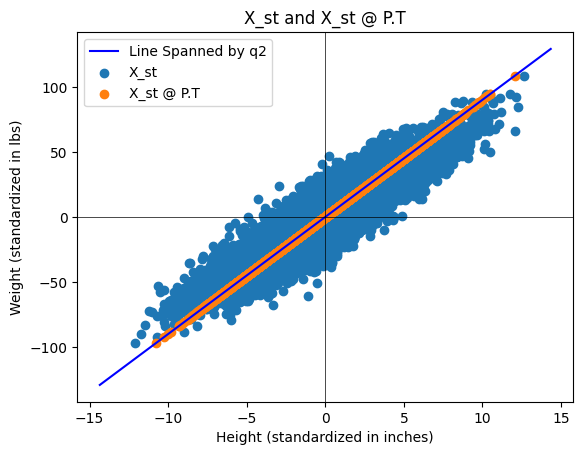

In [23]:
q1 = Q[:,0] # the first column
q2 = Q[:,1] # the second column
P = np.outer(q2, q2.T)

# Plotting
t = np.linspace(-130, 130, 2)
fig, ax = plt.subplots()
# ax.plot(t*q1[0], t*q1[1], 'r', label='Line Spanned by q1')
ax.plot(t*q2[0], t*q2[1], 'b', label='Line Spanned by q2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.scatter(X_st[:,0], X_st[:,1], label='X_st')
plt.scatter(X_st @ P[:,0], X_st @ P[:,1], label='X_st @ P.T')
plt.title("X_st and X_st @ P.T")
plt.xlabel("Height (standardized in inches)")
plt.ylabel("Weight (standardized in lbs)")
plt.legend()
plt.show()

*About Python plots*: You can plot subspaces spanned by columns of a matrix with the following code:

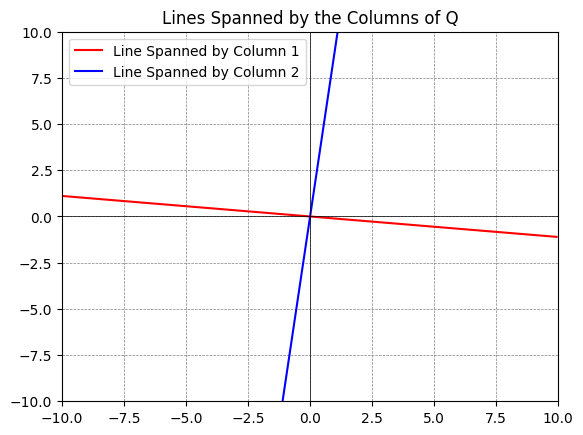

In [24]:
q1 = Q[:,0] # the first column
q2 = Q[:,1] # the second column

# Define a range for t, which will be used to extend the lines
t = np.linspace(-10, 10, 2)

# Plotting
fig, ax = plt.subplots()
# For each vector, plot a line that it spans
ax.plot(t*q1[0], t*q1[1], 'r', label='Line Spanned by Column 1')
ax.plot(t*q2[0], t*q2[1], 'b', label='Line Spanned by Column 2')

# Adjust the plot limits and style
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Lines Spanned by the Columns of Q')

# Display the plot
plt.show()

Our data set $X$ (and $X_{st}$) has two components, those being 2 eigenvalues/eigenvectors. Via the projection $X_{st} P^T$ we carry out a dimensional reduction (from 2 to 1) down onto the most important dimension of the data set. In this example it is not smart to do this dimensional reduction, since the variance in both weight and height are important.


If the data $X_{st}$ had $k$ columns and the $C$ matrix thus became $k \times k$ with $k$ eigenvalues, one should do an orthogonal projection of $X_{st}$ onto the subspace of $\mathbb{R}^k$ spanned by the eigenvectors corresponding to the "largest" eigenvalues, since these are the "most important" components. If the eigenvalues of $C$ for instance are $1,0.7,0.5,0.01,001$, $P$ should do the orthogonal projection on the subspace spanned by the eigenvectors corresponding to the three largest eigenvalues.

### Question n

Let us again look at some data matrices $Y$ with 3 columns such that we can consider $Y$ as a set of points in $\mathbb{R}^3$. The data matrix $Y$ in the code below is generated "randomly", but according to the rules:

1. $Y$ is standardized (each column has zero as its average),
1. The eigenvalues of $C= \frac{1}{n-1}  Y^T Y$ are approximately equal to $\lambda_1, \lambda_2. \lambda_3$, which are given by the use in the line `eigenvalues = [5, 1, 0.04]`.

In [25]:
# Function to generate a synthetic dataset
def generate_3d_data(eigenvalues, size=1000, dim=3):
    # Eigenvalues specified by the user
    assert len(eigenvalues) == dim, "There must be exactly dim eigenvalues."
    
    # Create a diagonal matrix for the eigenvalues
    Lambda = np.diag(eigenvalues)
    
    # Generate a random orthogonal matrix (eigenvectors)
    Q, _ = np.linalg.qr(np.random.randn(dim, dim))
    
    # Generate random data from a standard normal distribution
    data_standard_normal = np.random.randn(size, dim)
    
    # Transform the data using the square root of the covariance matrix
    data_transformed = data_standard_normal @ np.sqrt(Lambda) @ Q.T
        
    # Construct the covariance matrix
    Cov = 1/(size-1) * data_transformed.T @ data_transformed
     
    return data_transformed, Cov

# Eigenvalues you want for your covariance matrix
eigenvalues = [5, 1, 0.04]

# Generate the data
Y, C = generate_3d_data(eigenvalues)

We can plot the data matrix $Y \in \mathbb{R}^{1000 \times 3}$ as 1000 data points in $\mathbb{R}^3$:

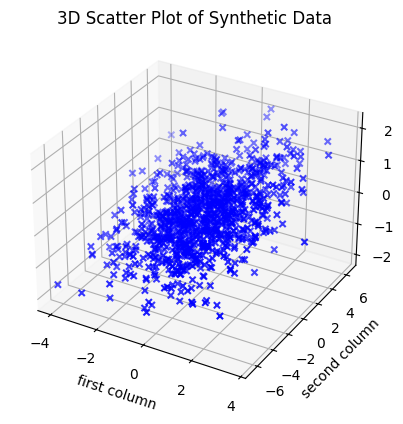

In [26]:
# %matplotlib qt   # plotted in a new window which can be rotated (remove #)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[:,0], Y[:,1], Y[:,2], c='b', marker='x')
ax.set_xlabel('first column') 
ax.set_ylabel('second column')
ax.set_zlabel('third column')
plt.title('3D Scatter Plot of Synthetic Data')
plt.show()

Choose different positive $\lambda_1, \lambda_2, \lambda_3$ in `eigenvalues = [5, 1, 0.04]` and investigate the appearing set of points by rotating the plot (you must remove the comment symbol from `%matplotlib qt`). Try both with examples where $\lambda_1$ is much larger than $\lambda_2, \lambda_3$, and where $\lambda_3$ is much smaller than $\lambda_1$ and $\lambda_2$. How does the shape of the set of points change with the eigenvalues? 

Think about this (roughly formulated statement): Eigenvalues of $C$ are, roughly speaking, given by the semi-axes in the ellipsoid that most effectively can "cover" the most data points. The directions of the symmetry axes of the ellipsoid are determined by the eigenvectors. Non-important "components" are along direction in which the ellipsoid is "flat".

##Extra and Optional Questions

### Question o

Perform PCA on one or more of the synthetic data sets $Y$ from the previous problem.

### Question p

Return to the data set $X$. Perform PCA for, respectively, male and female test subjects:

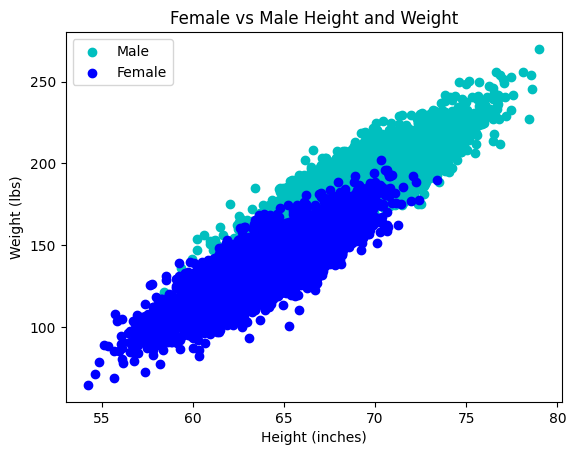

In [27]:
# Filter the data for males
male_data = data[data['Gender'] == '"Male"']
female_data = data[data['Gender'] == '"Female"']

# Access the columns for male data
male_height = male_data['Height']
male_weight = male_data['Weight']
female_height = female_data['Height']
female_weight = female_data['Weight']

# Plot the male weight and height
plt.scatter(x=male_height, y=male_weight, color='c', label='Male')
plt.scatter(x=female_height, y=female_weight, color='b', label='Female')
plt.title("Female vs Male Height and Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.legend()
plt.plot()